## Лабораторная работа 3
### Нагаев Александр 20-ИВТ-3
### Вариант 39

Цель лабораторной работы – получение навыков работы с методами классификации.
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Классификаторы:
* Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)
* Линейный классификатор (персептрон)



### Описание набора данных
Релевантная информация: Каждая запись представляет собой пример руки, состоящей из пяти игральных карт, взятых из стандартной колоды из 52 карт. Каждая карта описывается с использованием двух атрибутов (масть и ранг), всего 10 прогнозируемых атрибутов. Есть один атрибут класса, который описывает «покерную руку». Порядок карт важен, поэтому существует 480 возможных комбинаций Royal Flush по сравнению с 4 (по одной на каждую масть - более подробно описано ниже).

Количество экземпляров: 25010 тренировок, 1000000 тестов

Количество атрибутов: 10 прогнозных атрибутов, 1 целевой атрибут.

### Информация об атрибутах:
1. S1 «масть карты №1»
Порядковый номер (1–4), обозначающий {Червы, Пики, Бубны, Трефы}
2. C1 «Ранг карты №1»
Числовые (1-13), представляющие (Туз, 2, 3, ..., Дама, Король)
3. S2 «масть карты №2»
Порядковый номер (1–4), обозначающий {Червы, Пики, Бубны, Трефы}
4. C2 «Ранг карты №2»
Числовые (1-13), представляющие (Туз, 2, 3, ..., Дама, Король)
5. S3 «масть карты №3»
Порядковый номер (1–4), обозначающий {Червы, Пики, Бубны, Трефы}
6. C3 «Ранг карты №3»
Числовые (1-13), представляющие (Туз, 2, 3, ..., Дама, Король)
7. S4 «масть карты №4»
Порядковый номер (1–4), обозначающий {Червы, Пики, Бубны, Трефы}
8. C4 «Ранг карты №4»
Числовые (1-13), представляющие (Туз, 2, 3, ..., Дама, Король)
9. S5 «масть карты №5»
Порядковый номер (1–4), обозначающий {Червы, Пики, Бубны, Трефы}
10. C5 «Ранг карты 5»
Числовые (1-13), представляющие (Туз, 2, 3, ..., Дама, Король)
11. КЛАСС «Покерная рука» Порядковый (0–9)

0: Ничего не под рукой; не признанная покерная рука

1: одна пара; одна пара равных рангов в пределах пяти карт

2: две пары; две пары равных рангов в пределах пяти карт

3: Тройка; три карты одного достоинства

4: Стрит; пять карт, расположенных последовательно без пробелов

5: Флэш; пять карт одной масти

6: Фулхаус; пара + разные три одинаковых ранга

7: Каре; четыре карты одного достоинства

8: Стрит-флеш; стрит + флеш

9: флеш-рояль; {Туз, Король, Дама, Валет, Десятка} + флеш

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
training_data = pd.read_csv('poker-hand-training-true.data.txt')
training_data.columns = ['Suit_of_card_#1', 'Rank_of_card_#1',
                    'Suit_of_card_#2', 'Rank_of_card_#2',
                    'Suit_of_card_#3', 'Rank_of_card_#3',
                    'Suit_of_card_#4', 'Rank_of_card_#4',
                    'Suit_of_card_#5', 'Rank_of_card_#5', 
                    'Poker_Hand']
training_data

,Suit_of_card_#1,Rank_of_card_#1,Suit_of_card_#2,Rank_of_card_#2,Suit_of_card_#3,Rank_of_card_#3,Suit_of_card_#4,Rank_of_card_#4,Suit_of_card_#5,Rank_of_card_#5,Poker_Hand
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
11513,1,11,1,6,3,8,4,13,3,13,1
11514,3,5,2,10,1,5,3,9,2,9,2
11515,3,11,3,1,4,3,2,1,1,2,1
11516,2,7,3,6,3,8,3,2,4,5,0


Удаление дупликатов

In [2]:
print("До:",training_data.index.size)
training_data.drop_duplicates(keep = 'first', inplace = True)
print("После:", training_data.index.size)

До: 11518
После: 11518


Оценка сбалансированности по классам

<AxesSubplot:xlabel='Poker_Hand', ylabel='count'>

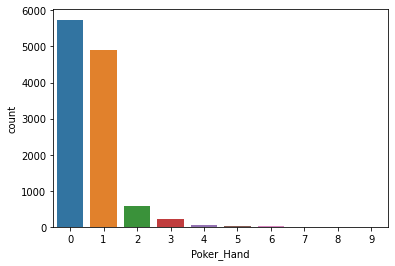

In [3]:
import seaborn as sns
sns.countplot(x = 'Poker_Hand', data = training_data)

Масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования

In [4]:
df = training_data.drop('Poker_Hand', axis = 1)
df

,Suit_of_card_#1,Rank_of_card_#1,Suit_of_card_#2,Rank_of_card_#2,Suit_of_card_#3,Rank_of_card_#3,Suit_of_card_#4,Rank_of_card_#4,Suit_of_card_#5,Rank_of_card_#5
0,2,11,2,13,2,10,2,12,2,1
1,3,12,3,11,3,13,3,10,3,1
2,4,10,4,11,4,1,4,13,4,12
3,4,1,4,13,4,12,4,11,4,10
4,1,2,1,4,1,5,1,3,1,6
...,...,...,...,...,...,...,...,...,...,...
11513,1,11,1,6,3,8,4,13,3,13
11514,3,5,2,10,1,5,3,9,2,9
11515,3,11,3,1,4,3,2,1,1,2
11516,2,7,3,6,3,8,3,2,4,5


До масштабирования:


<AxesSubplot:>

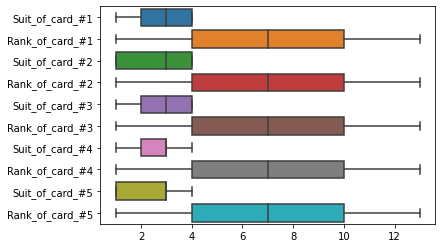

In [5]:
print("До масштабирования:")
sns.boxplot(data = df, orient = 'h')

После масштабирования:


<AxesSubplot:>

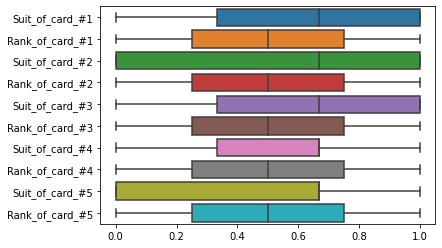

In [6]:
from sklearn.preprocessing import MinMaxScaler

print("После масштабирования:")

scale = MinMaxScaler()
scale.fit(df)
df = scale.transform(df)
df = pd.DataFrame(df)
df.columns = ['Suit_of_card_#1', 'Rank_of_card_#1',
                    'Suit_of_card_#2', 'Rank_of_card_#2',
                    'Suit_of_card_#3', 'Rank_of_card_#3',
                    'Suit_of_card_#4', 'Rank_of_card_#4',
                    'Suit_of_card_#5', 'Rank_of_card_#5']

sns.boxplot(data = df, orient = 'h')




Замена категориальных признаков

In [7]:
from sklearn.preprocessing import OneHotEncoder

Encoder = OneHotEncoder(sparse = False)

n_Encoder = Encoder.fit_transform(training_data.Poker_Hand.values.reshape(-1,1))

tmp_df = pd.DataFrame(n_Encoder, columns=['Poker_Hand=' + str(i) for i in range(n_Encoder.shape[1])])

new_df = pd.concat([training_data, tmp_df], axis = 1)

new_df.drop('Poker_Hand', axis = 1, inplace = True)
new_df.dropna(how = 'any', inplace = True)
new_df

,Suit_of_card_#1,Rank_of_card_#1,Suit_of_card_#2,Rank_of_card_#2,Suit_of_card_#3,Rank_of_card_#3,Suit_of_card_#4,Rank_of_card_#4,Suit_of_card_#5,Rank_of_card_#5,Poker_Hand=0,Poker_Hand=1,Poker_Hand=2,Poker_Hand=3,Poker_Hand=4,Poker_Hand=5,Poker_Hand=6,Poker_Hand=7,Poker_Hand=8,Poker_Hand=9
0,2,11,2,13,2,10,2,12,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,12,3,11,3,13,3,10,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,10,4,11,4,1,4,13,4,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,4,13,4,12,4,11,4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,2,1,4,1,5,1,3,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11513,1,11,1,6,3,8,4,13,3,13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11514,3,5,2,10,1,5,3,9,2,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11515,3,11,3,1,4,3,2,1,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11516,2,7,3,6,3,8,3,2,4,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Оценка корреляции между признаками и удаление признаков, которые коррелируют с наибольшим числом других

<AxesSubplot:>

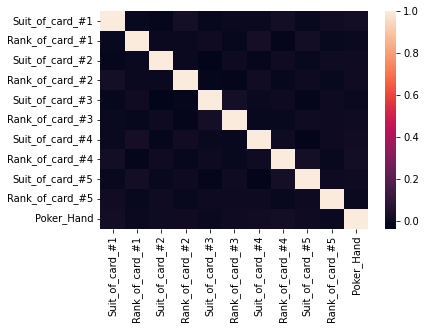

In [8]:
sns.heatmap(training_data.corr())

Заполнение пустых значений

In [9]:
training_data.isnull().sum()

Suit_of_card_#1    0
Rank_of_card_#1    0
Suit_of_card_#2    0
Rank_of_card_#2    0
Suit_of_card_#3    0
Rank_of_card_#3    0
Suit_of_card_#4    0
Rank_of_card_#4    0
Suit_of_card_#5    0
Rank_of_card_#5    0
Poker_Hand         0
dtype: int64

Решение поставленной задачи классификации

In [10]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import Perceptron

In [11]:
from sklearn.model_selection import train_test_split
x = df
y = training_data['Poker_Hand']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


Классификатор K ближайших соседей, задаётся радиус для выбора ближайших объектов

In [12]:
import warnings

warnings.simplefilter('default')

clf = RadiusNeighborsClassifier()

param_grid = {'radius' : np.arange(0.1,5,0.1)}

grid = GridSearchCV(clf, param_grid = param_grid, n_jobs = -1)
grid.fit(x_train, y_train)

best_radius = grid.best_estimator_.radius


C:\Users\Александр\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Александр\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan 0.51041685 0.51714708 0.51410773 0.51530232 0.50510115
 0.49641871 0.49348823 0.49337971 0.49337971 0.49337971 0.49337971
 0.49337971 0.49337971 0.49337971 0.49337971 0.49337971 0.49337971
 0.49337971 0.49337971 0.49337971 0.49337971 0.49337971 0.49337971
 0.49337971 0.49337971 0.49337971 0.49337971 0.49337971 0.49337971
 0.49337971 0.49337971 0.49337971 0.49337971 0.49337971 0.49337971
 0.49337971 0.49337971 0.49337971 0.49337971 0.49337971 0.49337971
 0.49337971]
  warnings.warn(


In [13]:
best_radius

0.9

In [14]:
clf = RadiusNeighborsClassifier(radius = best_radius)

clf.fit(x_train, y_train)

RadiusNeighborsClassifier(radius=0.9)

In [15]:
prediction = clf.predict(x_test)

print("Best radius:", best_radius)
print("Accuracy:", accuracy_score(y_test, prediction))
prediction

Best radius: 0.9
Accuracy: 0.5368923611111112


array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

Линейный классификатор (персептрон)

In [16]:
import warnings

prc = Perceptron()

warnings.simplefilter("ignore")

grid = GridSearchCV(prc, {'max_iter': np.arange(15,100)}, n_jobs = -1)
grid.fit(x_train, y_train)

best_acc = grid.best_score_
best_alpha = grid.best_estimator_.alpha
best_max_iter = grid.best_estimator_.max_iter

print('Best max_iter:', best_max_iter)
print('Best accuracy:',best_acc)

prc = Perceptron(alpha = best_alpha, max_iter = best_max_iter)
prc.fit(x_train, y_train)
prediction  = prc.predict(x_test)


print('Accuracy:', accuracy_score(y_test, prediction))

prediction

Best max_iter: 16
Best accuracy: 0.4174165475140553
Accuracy: 0.5164930555555556


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Сравните кривые для классификаторов

In [17]:
from sklearn.calibration import CalibratedClassifierCV

n_classes = 10

calibrated_prc = CalibratedClassifierCV(prc)
calibrated_prc.fit(x_train, y_train)


CalibratedClassifierCV(base_estimator=Perceptron(max_iter=16))

In [18]:
prob_prc = calibrated_prc.predict_proba(x_test)
prob_prc

array([[4.91218147e-01, 4.29445929e-01, 4.86200036e-02, ...,
        4.34681401e-04, 1.07890393e-03, 8.48238591e-04],
       [4.91716255e-01, 4.27817660e-01, 5.12062894e-02, ...,
        4.29875899e-04, 8.41121751e-04, 7.11729055e-04],
       [4.91497311e-01, 4.28654631e-01, 5.07147358e-02, ...,
        4.36650901e-04, 7.57261913e-04, 7.67906939e-04],
       ...,
       [4.85795952e-01, 4.32743919e-01, 4.90648949e-02, ...,
        4.35998627e-04, 8.42367386e-04, 7.26011837e-04],
       [4.96543302e-01, 4.24818525e-01, 5.00852629e-02, ...,
        4.33005018e-04, 7.20506028e-04, 8.08639303e-04],
       [4.85824939e-01, 4.30305182e-01, 4.93921981e-02, ...,
        4.34122759e-04, 7.27370484e-04, 8.61776450e-04]])

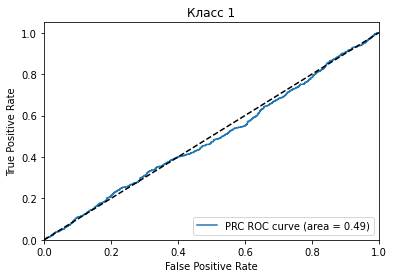

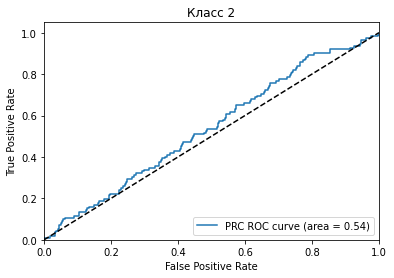

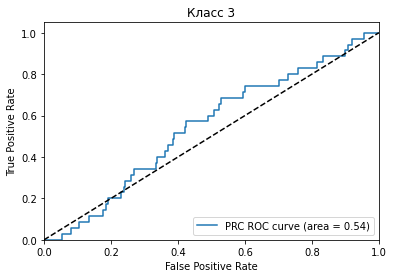

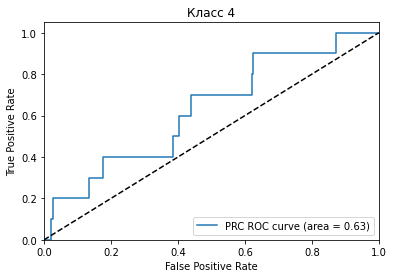

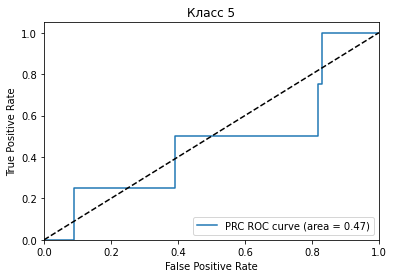

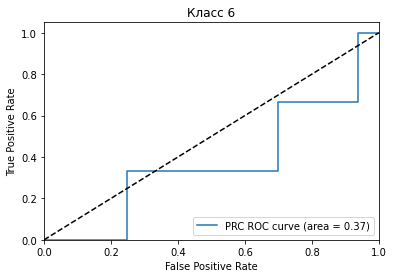

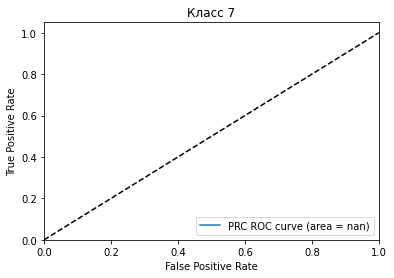

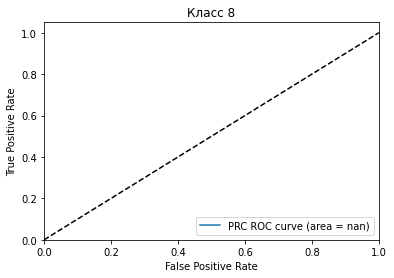

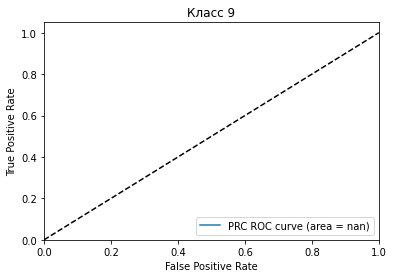

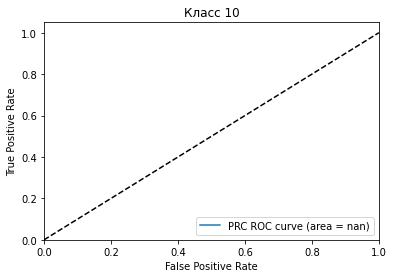

In [19]:
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
# Compute ROC curve and ROC area for each class
y_train = label_binarize(y_train, classes = [*range(1,n_classes+1)])
y_test = label_binarize(y_test, classes = [*range(1,n_classes+1)])

prc_fpr = dict()
prc_tpr = dict()
prc_roc_auc = dict()

for i in range(n_classes):
    prc_fpr[i], prc_tpr[i], _ = roc_curve(y_test[:, i], prob_prc[:, i])
    prc_roc_auc[i] = auc(prc_fpr[i], prc_tpr[i])


# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(prc_fpr[i], prc_tpr[i], label='PRC ROC curve (area = %0.2f)' % prc_roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Класс %i' %(i+1))
    plt.legend(loc="lower right")
    plt.show()

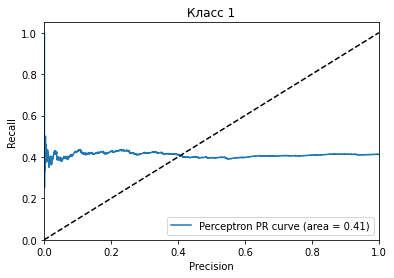

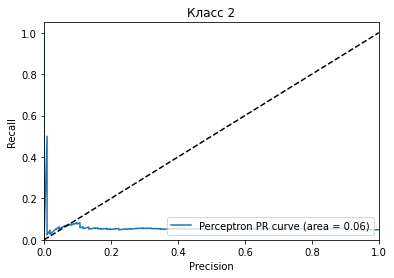

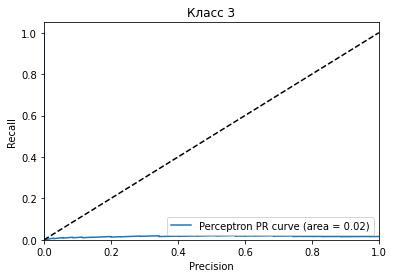

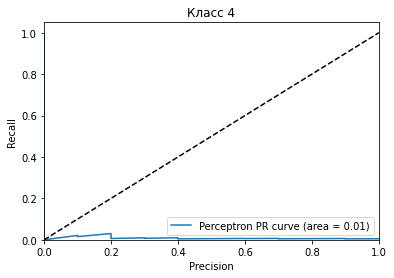

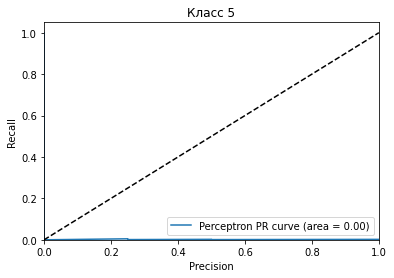

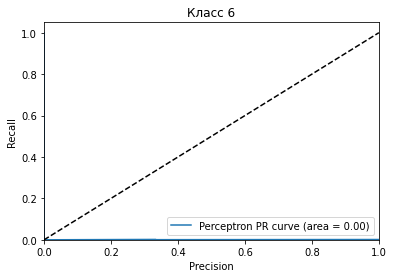

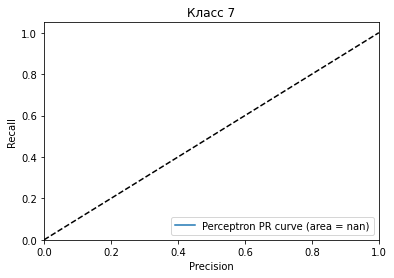

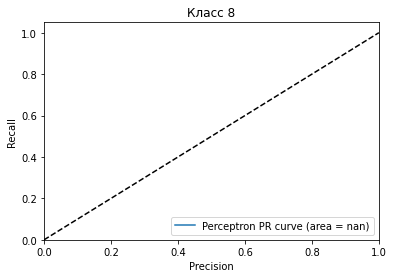

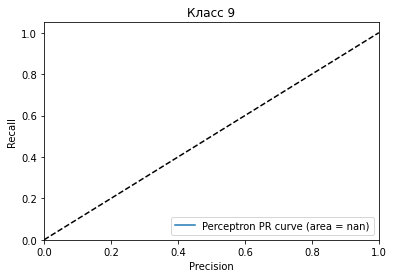

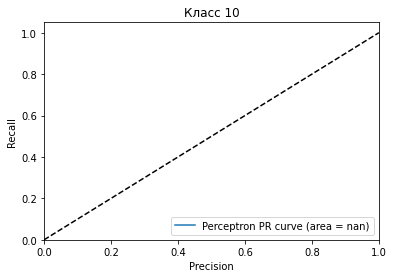

In [20]:
prc_recall = dict()
prc_precision = dict()
prc_pr_aps = dict()

for i in range(n_classes):
    prc_precision[i], prc_recall[i], _ = precision_recall_curve(y_test[:, i], prob_prc[:, i])
    prc_pr_aps[i] = average_precision_score(y_test[:, i], prob_prc[:, i])


# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(prc_recall[i], prc_precision[i], label='Perceptron PR curve (area = %0.2f)' % prc_pr_aps[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Класс %i' %(i+1))
    plt.legend(loc="lower right")
    plt.show()

In [21]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

clff = OneVsRestClassifier(clf)

clff.fit(x_train, y_train)

prob_knn = clff.predict_proba(x_test)
y_test.shape

(2304, 10)

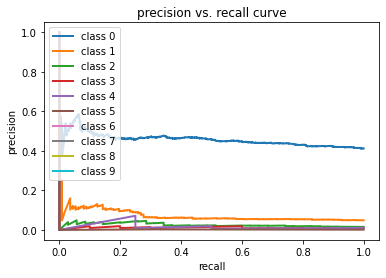

In [22]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        prob_knn[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

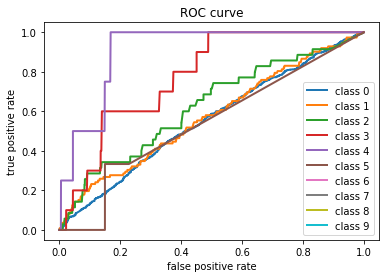

In [23]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  prob_knn[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()